# Bay Wheels Data Exploration Project

# Talal Al-Dawudi

## Introduction

Bay Wheels, formerly known as Ford GoBike, is a bike sharing service operating in San Francisco Bay Area, in California. With its growing availability, increasing supply of electric bikes to their range, and mounting number of annual subscribers, Bay Wheels has become a major option for both daily commuters and casual users.

This project aims to dive deeper into the Bay Wheels' data to gain a deeper understanding of their operations. The dataset used for this analysis is comprised of Bay Wheels' 2019 data (January through December), which is available to us in CSV format on the company's website.

## Preliminary Wrangling

I will be wrangling data for January-December 2019. This data is given to us as separate monthly CSV's, so I will use glob to store and merge the files into one dataset: "2019_baywheels_data.csv". The dataset will encompass approximately 2,506,983 rides, over the course of the 12 month period.

### Gathering  Data

In this stage, I will gather the data required for the exploration. This will be a relatively simple task, as I am going to read a CSV that was downloaded to my laptop from the Bay Wheels website.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import os
import glob
import math
from math import radians, sin, cos, acos

In [18]:
path = ('/Users/talaldawudi/Desktop/baywheels19')

files = glob.glob(os.path.join(path, "*.csv"))

df = pd.concat((pd.read_csv(f) for f in files), ignore_index = True)

df.to_csv('2019_baywheels_data.csv', index = False)


/Users/talaldawudi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  """
/Users/talaldawudi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  """
/Users/talaldawudi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  """


In [19]:
# I downloaded the August 2020 csv from Bay Wheels. I will be loading it from the Data folder on my laptop.

df = pd.read_csv('2019_baywheels_data.csv')
df.sample(5)

/Users/talaldawudi/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
610060,6013,2019-07-03 13:36:38.5900,2019-07-03 15:16:52.1700,400.0,Buchanan St at North Point St,37.804272,-122.433537,400.0,Buchanan St at North Point St,37.804272,-122.433537,2656,Customer,No,NaN
1746272,644,2019-01-01 16:58:38.3370,2019-01-01 17:09:22.6600,31.0,Raymond Kimbell Playground,37.783813,-122.434559,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,5003,Subscriber,Yes,NaN
1652855,565,2019-01-19 02:52:09.0650,2019-01-19 03:01:34.4650,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,5142,Subscriber,No,NaN
543017,475,2019-07-16 08:18:35.5890,2019-07-16 08:26:30.9190,78.0,Folsom St at 9th St,37.773717,-122.411647,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,799,Subscriber,No,NaN
2143426,450,2019-11-27 15:09:55.4050,2019-11-27 15:17:25.6180,51.0,Parker Ave at McAllister St,37.776101,-122.453093,71.0,Broderick St at Oak St,37.773063,-122.439078,2724,Subscriber,No,NaN


### Assessing Data

I have opened the CSV file on excel to give the data a quick visual inspection. For more detailed insights on whether the data is in suitable condition to analyze, I will run a few programatic tests in this section. Any interesting insights or areas to fix will be highlighted along the way.

In [20]:
print(df.shape)
print(df.dtypes)
print(df.head(10))

(2506983, 15)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
bike_share_for_all_trip     object
rental_access_method        object
dtype: object
   duration_sec                start_time                  end_time  \
0         60863  2019-09-30 11:48:02.7100  2019-10-01 04:42:25.8640   
1         36019  2019-09-30 16:16:32.3530  2019-10-01 02:16:51.9820   
2          5615  2019-09-30 23:12:25.9980  2019-10-01 00:46:01.9590   
3          1482  2019-09-30 23:57:34.6630  2019-10-01 00:22:16.8490   
4          1272  2019-09-30 23:53:28.6530  2019-10-01 00:14:41.0740   
5          8648  2019

**Needs fixing**
- start_time and end_time columns need to be converted to datetime for more accurate results.
- start_station_id and end_station_id do not need to be in float format. Easier if they were in string format.
- user_type, bike_share_for_all_trip can be converted into categorical types instead of objects.

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
 14  rental_access_method     object 
dtypes: float64(6), int64(2), object(7)
memory usage: 286.9+ MB


In [31]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,2.506983e+06,2.426249e+06,2.506983e+06,2.506983e+06,2.424081e+06,2.506983e+06,2.506983e+06,2.506983e+06
mean,8.076483e+02,1.465047e+02,3.776506e+01,-1.223499e+02,1.427044e+02,3.776422e+01,-1.223459e+02,2.789833e+04
std,1.974714e+03,1.223171e+02,1.363698e-01,3.089648e-01,1.214296e+02,2.392885e-01,7.080417e-01,1.146067e+05
min,6.000000e+01,3.000000e+00,0.000000e+00,-1.225143e+02,3.000000e+00,0.000000e+00,-1.225143e+02,4.000000e+00
25%,3.590000e+02,4.700000e+01,3.776931e+01,-1.224130e+02,4.300000e+01,3.777003e+01,-1.224117e+02,1.952000e+03
50%,5.710000e+02,1.050000e+02,3.778053e+01,-1.223983e+02,1.010000e+02,3.778076e+01,-1.223981e+02,4.420000e+03
75%,8.870000e+02,2.430000e+02,3.779539e+01,-1.222914e+02,2.390000e+02,3.779587e+01,-1.222934e+02,9.682000e+03
max,9.121100e+05,4.980000e+02,4.551000e+01,0.000000e+00,4.980000e+02,4.551000e+01,0.000000e+00,9.999410e+05


In [32]:
df.duplicated().sum()

0

There are no duplicates in this dataset, which is great from a cleaning perspective.

In [33]:
df.user_type.value_counts()

Subscriber    2021166
Customer       485817
Name: user_type, dtype: int64

In [34]:
df.bike_share_for_all_trip.value_counts()

No     2086152
Yes     177572
Name: bike_share_for_all_trip, dtype: int64

In [35]:
df.rental_access_method.value_counts()

app        108010
clipper     12828
Name: rental_access_method, dtype: int64

Because the data does not provide too much information to analyze (for example, more info on customer demographics), in order to get the best use out of this data set, start_time can be broken down into more in depth info (month, day of the week, hour of the day) to gain a deeper understanding of customer patterns. 

We may also want to convert the duration columns into minutes for more intuitive analysis (example: saying average ride time is 15 minutes versus 900 seconds).

### Cleaning Data

In [36]:
#We will start by creating a clean copy of the dataframe. I will clean the new dataframe (df_clean)
df_clean = df.copy()

**Define:** We will first convert all datatypes mentioned in assessment stage to their appropriate datatypes for analysis.

**Code:**

In [37]:
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])

df_clean['start_station_id'] = df_clean['start_station_id'].astype('str')
df_clean['end_station_id'] = df_clean['end_station_id'].astype('str')

df_clean['user_type'] = df_clean['user_type'].astype('category')
df_clean['bike_share_for_all_trip'] = df_clean['bike_share_for_all_trip'].astype('category')
df_clean['rental_access_method'] = df_clean['rental_access_method'].astype('category')

**Test:**

In [38]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  int64         
 12  user_type                category      
 13  bike_share_for_all_trip  category      
 14  rental_access_method     category      
dtypes: category(3), datetime64[ns](2), float64(4), int64(2), object(4)
memory usage: 236.7+ MB


Great, the types have been changed to the appropriate format.

**Define:** for the best analysis possible, we will need to create additional columns that tell us more about the data.
This includes changing the trip duration column (from seconds to minutes), in addition to creating month, day of week, and hour of day columns. This information will better equip us to understand patterns associated with timing.

**Code:**

In [39]:
# Creating a new duration column to express the trip's duration in minutes.
df_clean['duration_mins']= (df_clean['duration_sec']/60).astype(int)

# Creating three separate columns to identify the date, day of week, and hour of the day that people use go bikes
df_clean['start_hourofday'] = df_clean['start_time'].dt.hour
df_clean['start_dayofweek'] = df_clean.start_time.dt.strftime('%a')
df_clean['month'] = df_clean.start_time.dt.strftime('%b')

df_clean['start_hourofday'] = df_clean['start_hourofday'].astype(int)

**Test:**

In [40]:
df_clean.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method,duration_mins,start_hourofday,start_dayofweek,month
1507232,418,2019-05-08 17:04:31.580,2019-05-08 17:11:30.214,50.0,2nd St at Townsend St,37.780526,-122.390288,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2315,Subscriber,No,NaN,6,17,Wed,May
610459,704,2019-07-03 13:25:00.400,2019-07-03 13:36:45.043,192.0,37th St at West St,37.826696,-122.271797,196.0,Grand Ave at Perkins St,37.808894,-122.256460,1550,Subscriber,No,NaN,11,13,Wed,Jul
28600,566,2019-09-26 17:04:26.570,2019-09-26 17:13:52.736,97.0,14th St at Mission St,37.768265,-122.420110,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,11536,Subscriber,No,NaN,9,17,Thu,Sep
890224,745,2019-03-12 12:13:08.153,2019-03-12 12:25:33.611,58.0,Market St at 10th St,37.776619,-122.417385,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,6322,Subscriber,No,NaN,12,12,Tue,Mar
809348,966,2019-03-20 17:47:05.310,2019-03-20 18:03:12.089,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,130.0,22nd St Caltrain Station,37.757288,-122.392051,5405,Subscriber,No,NaN,16,17,Wed,Mar


Great, the new columns we need are here.

In [41]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 19 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  int64         
 12  user_type                category      
 13  bike_share_for_all_trip  category      
 14  rental_access_method     category      
 15  duration_mins            int64         
 16  start_hourofday          int64         
 17  start_dayofweek          ob

The data is in the format we would like it to be in.

In [263]:
#Export clean data to CSV
df_clean.to_csv('baywheels19_master_clean.csv')

### What is the structure of your dataset?

The Bay Wheels data I will be using for this project is simple and easy to work with. I've gathered data from Bay Wheels' 2019 data. There are approximately 2,506,983 rides in the dataset. The types of data vary.

Strings/Objects:
- **Start_station_id** and **end_station_id**, which are numerically assigned to each individual station.
- **start_station_name** and **end_station_name**, which are individually assigned to each individual station. 

Datetime Data:
- **start_time** (The exact timing, including date, during which a ride began).
- **end_time** (The exact timing, including date, during which a ride ended).

Categorical Data:
- **user_types** (which groups rides into those taken by subscribers versus those taken by casual (customer) users)
- **bike_shre_for_all_trip**
- **rental_access_method** : did members access their ride through the clipper or the app?

Floats:
- **start_station_latitude, start_station_longtitude**
- **end_station_latitude, end_station_longtitude**

These four columns give us the geographic coordinates for when a ride started and ended, including start latitude and longtitude coordinates, and end latitude and longtitude coordinates.

Since this data is quite simple and broad, I decided to break down the start time of each ride into 3 different columns:
1. **start_dayofweek**: Day of the week the ride started (string/object)
2. **start_hourofday**: The specific hour of the day the ride was started (integer, we do not need it to be a float as it represents a specific hour)
3. **start_date**: the specific date in which the ride started (string/object format as we will not use this for anything more than visual aid)
4. **Month**: the month during which the ride started.


Finally, the **duration_mins** column I created represents the length of each specific ride in minutes.


### What is/are the main feature(s) of interest in your dataset?

Since we do not have much customer-specific data to work with, I'll be most interested in examining rental behavior of the users. I'd like to know how the demand for bikes varies depending on month, day of week, hour of the day, and potentially the location of the station itself. I think it would also be interesting to take a closer look at how long people rent bikes for in order to understand how the service is being used.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?


month, start_dayofweek, start_hourofday and duration_mins will be especially helpful in understanding the demand for the bikes on a micro level. Duration_mins will also give us a good idea of how long people usually rent the bikes for, which can also help us infer whether or not they travel longer or shorter distances with the bikes.

## Univariate Exploration

In this section, I'll be exploring the relationship between individual variables. All comments and observations will be documented along the way.

**Trips By Month**

In [42]:
#Starting simple, we can take a look at what months, days of the week, and hours of the day are most/least popular.
#We'll start with months 

df_clean.month.describe()

count     2506983
unique         12
top           Jul
freq       258102
Name: month, dtype: object

From above, we can see that more than 10% of the rides in our data set took place in July.
Since our data is categorical, we can see what volume was like for all months using a bar chart.

In [63]:
df_month_agg = pd.DataFrame(df_clean.groupby('month').size()).reset_index().rename(columns={0:'count'})
df_month_agg = df_month_agg.sort_values(by='count',ascending=False)

Text(0.5, 1.0, 'Bay Wheels Rides per Month')

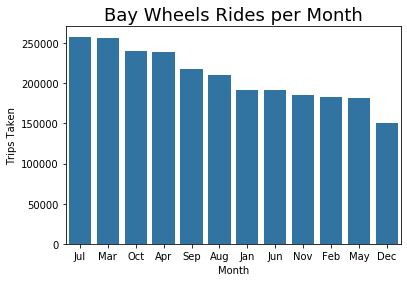

In [73]:
bar_color1 = sb.color_palette()[0]
month_bar_chart = sb.barplot(data = df_month_agg, x='month',y='count', color = bar_color1)

plt.xlabel("Month", size=10)
plt.ylabel("Trips Taken", size=10)
plt.title("Bay Wheels Rides per Month", size=18);

It appears from the bar chart above that July and March were Bay Wheel's busiest months in 2019. Because the busy months don't follow a particular pattern (for example, notably busier in summer months versus the spring), it is hard to say that weather is a leading factor that drives the bike rentals, especially since weather is temperate in the San Francisco Bay Area year round.

Tourism in July might be one of the factors leading to the spike in rentals.

December seems to have notably less rides than even the least busy months, which might be attributed to the holiday season, when many people leave the city to see their families, or go on holiday. 

**Trips by Hour Started**

In [75]:
df_hour_agg = pd.DataFrame(df_clean.groupby('start_hourofday').size()).reset_index().rename(columns={0:'count'})
df_hour_agg = df_hour_agg.sort_values(by='count',ascending=False);

Text(0.5, 1.0, 'Bay Wheels Rides by Hour')

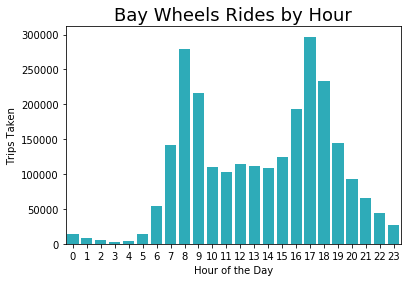

In [76]:
bar_color2 = sb.color_palette()[9]
hour_bar_chart = sb.barplot(data = df_hour_agg, x='start_hourofday',y='count', color = bar_color2)

plt.xlabel("Hour of the Day", size=10)
plt.ylabel("Trips Taken", size=10)
plt.title("Bay Wheels Rides by Hour", size=18);

Unsurprisingly, demand for bikes is extremely low from midnight to 5AM, as most people are sleeping. 

Demand for the bikes picks up drastically from 7AM to 9AM, which closely coincides with the typical start of a workday. This signifies that this bike rental service is used by many for their daily work commutes. 

Demand drops off, albeit not dramatically, at around 10AM, and remains at roughly the same levels until 3PM. This lets us know that people are still using the service for purposes other than a work commute. We obviously cannot determine what people are using the bikes for by solely looking at this chart, but many people run errands, explore the city, and shop during these hours in the day. 

Demand rapidly picks up from 4PM to 6PM, which might again be attributed to the end of the working day, asserting that many rely on this service for their work commutes.

Finally, demand drops far more significantly after 7PM, and continues to drop until 6AM.

**Trips by Day of the Week** 

In [78]:
df_weekday_agg = pd.DataFrame(df_clean.groupby('start_dayofweek').size()).reset_index().rename(columns={0:'count'})
df_weekday_agg = df_weekday_agg.sort_values(by='count',ascending=False);

Text(0.5, 1.0, 'Bay Wheels Rides by Day of Week')

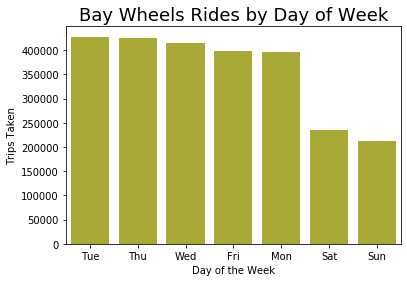

In [87]:
bar_color3 = sb.color_palette()[8]
hour_bar_chart = sb.barplot(data = df_weekday_agg, x='start_dayofweek',y='count', color = bar_color3)

plt.xlabel("Day of the Week", size=10)
plt.ylabel("Trips Taken", size=10)
plt.title("Bay Wheels Rides by Day of Week", size=18);

Another very interesting pattern is revealed in this bar chart. Demand for the bikes is most significant, and remains relatively steady, during weekdays. The strongest days of the week are Tuesdays and Thursdays, and demand drops by close to 45% on Saturdays and Sundays, signifying that a large amount of Bay Area residents use Bay Wheels as a means to commute to and from work every day. The drop in demand on the weekends might signify that far less people use the bikes for leisurely purposes (e.g. exploring the city, going to and from different parts of town on the weekends). 

**Rides by Duration (in minutes)** 

In [88]:
df_clean.duration_mins.describe(percentiles = [.95])
df_clean.duration_mins.describe()

count    2.506983e+06
mean     1.296946e+01
std      3.291311e+01
min      1.000000e+00
25%      5.000000e+00
50%      9.000000e+00
75%      1.400000e+01
max      1.520100e+04
Name: duration_mins, dtype: float64

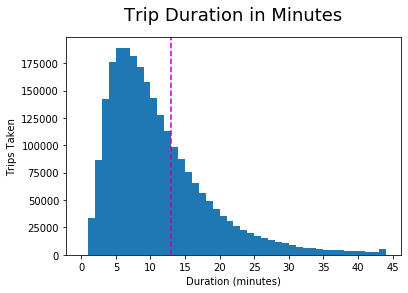

In [112]:
#Since its a quantitative variable against another, we will be working with a histogram

#We're sitting our bin edges from 0-45 (the maximum allotted time for a Bay Wheels member is 45 minutes per trip)
bin_edges = np.arange(0, 45, 1)
ticks = [0, 5, 10, 15, 20, 25, 30,  35, 40, 45]
labels = ['{}'.format(val) for val in ticks]

plt.hist(data = df_clean, x = 'duration_mins', bins = bin_edges)

plt.title("Trip Duration in Minutes", y=1.05, fontsize=18)
plt.xlabel('Duration (minutes)', size = 10)
plt.xticks(ticks, labels)
plt.ylabel('Trips Taken', size =10)
plt.axvline(df_clean.duration_mins.mean(), color='m', linestyle='dashed', linewidth=1.5);

The histogram is sharply right skewed and provides pretty interesting insights. The mode seems to be somewhere between 5-7, meaning most trips that people take with Bay Wheels are between 5 to 7 minutes. The mean duration of trips seems to fall right at 12.5 minutes per trip, and the majority of our data lies under 20 minutes. Given that the maximum allotment of time is 45 minutes per ride, it is interesting to see that most rides are quite short, indicating that people use Bay Wheels mostly for short-distance commutes. 

**User Type**

In [141]:
#Let's take a look at how user type varies
user_type = df_clean.user_type.value_counts()

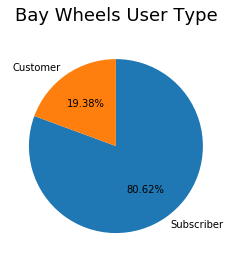

In [142]:
#With a pie chart, we'll be able to see what the spread between the two categories looks like.

plt.pie(user_type, labels = user_type.index, 
        startangle = 90, autopct= '%1.2f%%', counterclock = False, textprops={'color':'Black'});

plt.title('Bay Wheels User Type', y=1.05, fontsize=18);

Bay Wheels describes a 'Subscriber' as a member of the bike sharing service, and a 'Customer' as a casual user of the bike sharing service.

As clearly depicted by the pie chart, there are far more subscribers than casual users (more than 80% of its users are subscribers), which indicates that their user base is largely comprised of local, repeat customers. Tourists would not see a need to subscribe to the service if visiting for a short period of time. Furthermore, we might assume that the majority of Bay Wheels' users tend to use this service frequently if they are able to justify a subscription.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Cleaning the data helped me get rid of any major anomalies and outliers. I also modified the histogram representing duration of trips to ensure that nothing above 45 minutes was counted (as this is the maximum allotted time). Very few of our data points exceeded this value, but the few trips that were over 45 minutes (including the maximum duration of approximately 15,000 minutes) heavily distorted our distribution and rendered my visualizations useless unless excluded.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Nothing was particularly outside of the spectrum of my expectations. I'm sure any comparable bike sharing company in a major city would have seen that commuters tend to use the service most, and that because of this, weekends tend to be less busy than weekdays. However, I was pretty surprised with the monthly pattern, and expected to see spring and summer months do definitively better than winter months (even though this was not the case). Because of this, I did not find it necessary to perform any transformations.


## **Bi Variate Exploration**

    This section will explore the relationships between two variables in the dataset. 

We can start by analyzing Customer & Subscriber behavior as two separate variables

Earlier, we saw what times were Bay Wheel's busiest by exploring trips taken at each hour interval. Since we saw peaks (as expected) during rush hours on weekdays, and much less traffic during the weekends, we assumed most people use the service for daily commutes. To further my analysis, it would be helpful to see the behavior of those who subscribe to the service (i.e. use the service so much that they justify a subscription) versus the behavior of casual users of the service. If we consider casual users to be infrequent users, we can analyze when they rent the bikes to see what kind of uses they get from the service. We should also see how long they rent bikes for in comparison to subscribers. 

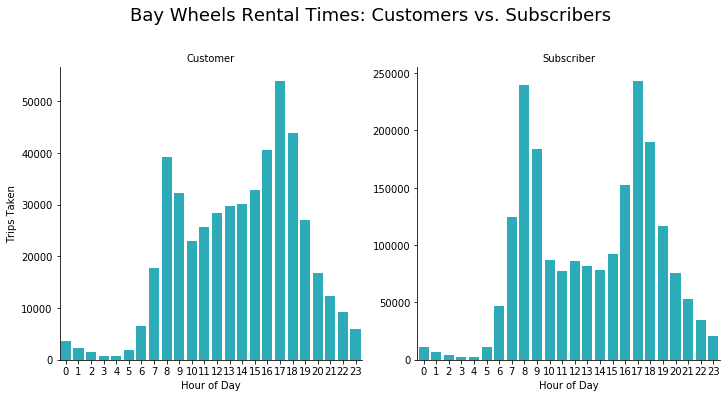

In [163]:
#We'll start by doing a side by side comparison of when casual users and subscribers rent the bikes
colorr = sb.color_palette()[9]

cust_vs_sub_time = sb.catplot(data=df_clean, x='start_hourofday', col="user_type", kind='count', sharey = False, 
                              color = colorr)

cust_vs_sub_time.set_axis_labels("Hour of Day", "Trips Taken")
cust_vs_sub_time.set_titles("{col_name}")
cust_vs_sub_time.fig.suptitle('Bay Wheels Rental Times: Customers vs. Subscribers', y= 1.1, fontsize=18)
cust_vs_sub_time.set_xticklabels(rotation=0);

**Similarities**: 
We see similar peaks and troughs in both charts, however, there is a significantly larger increase in demand during rush hours for subscribers. This is in line with our expectations, as any paid subscriber using this service will likely use it for daily commutes, such as going to and from work. Both customers and subscribers have relatively equal low demand periods as well, seeing little to no activity from 12AM-5AM, and lower levels of activity from 8PM onwards. 

**Differences**:
There is a visible difference between customer and subscriber rental behavior lies between 10AM and 5PM. This might indicate that some customers are tourists and leisurely users, who are biking around the city throughout the day. However, this information alone is not enough to determine whether or not this is true.

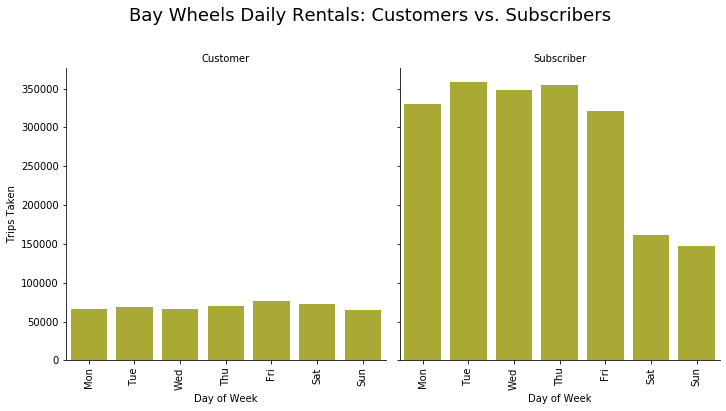

In [153]:
#We should try seeing whether customers and subscribers have different demand patterns on weekends versus weekdays.
#We will do this using another bar chart
colorr1 = sb.color_palette()[8]
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

cust_vs_sub_day = sb.catplot(data=df_clean, x='start_dayofweek', col="user_type", kind='count', sharey = True, 
                              color = colorr1, order = weekday)

cust_vs_sub_day.set_axis_labels("Day of Week", "Trips Taken")
cust_vs_sub_day.set_titles("{col_name}")
cust_vs_sub_day.fig.suptitle('Bay Wheels Daily Rentals: Customers vs. Subscribers', y= 1.1, fontsize=18)
cust_vs_sub_day.set_xticklabels(rotation=90);

Interestingly, demand stays relatuvely constant for customers on all days of the week (including the weekends). This is in stark contrast to subscribers, who clearly use the service far more for work commuting than customers given the dramatic drop in demand on weekends.

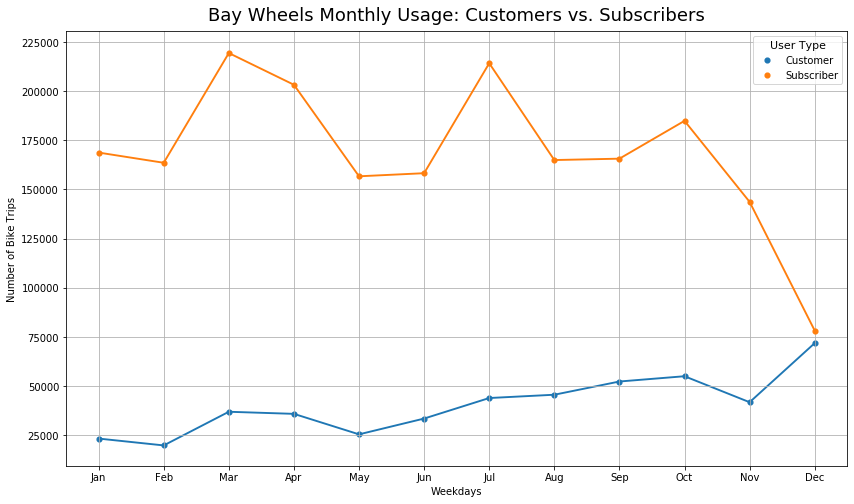

In [176]:
#We can also use a line chart to see what demand looks like on a monthly basis for both user types

plt.figure(figsize=(14, 8))
monthly = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

user_monthly_data = df_clean.groupby(['month', 'user_type']).size().reset_index()

user_monthly_line_chart = sb.pointplot(data=user_monthly_data, x='month', hue = 'user_type', y=0, scale=.7, 
                                      order = monthly)

plt.title('Bay Wheels Monthly Usage: Customers vs. Subscribers', y=1.01, fontsize=18)
plt.xlabel('Weekdays')
plt.ylabel('Number of Bike Trips')
axis = plt.gca()
legend = axis.legend()
legend.set_title('User Type',prop={'size':11})
plt.grid();

Demand starts off slow in the winter months of January and February for both user types, and dramatically increases in March. Demand slows in April and abruptly increases during the summer months for both user types. Interestingly, unlike subscribers, customers see an increase in demand up until October (which might be attributed to summer tourism). 

Another interesting observation is that subscriber demand dramatically falls for November and December, while customer demand reaches its peak during this period. This stark contrast in behavior suggests that holiday tourism increases demand for bike rentals in the Bay Area (among casual users who do not need a subscription), while subscribers either leave the Bay Area for the holidays, or do not use the service for commutes during this period of time. 

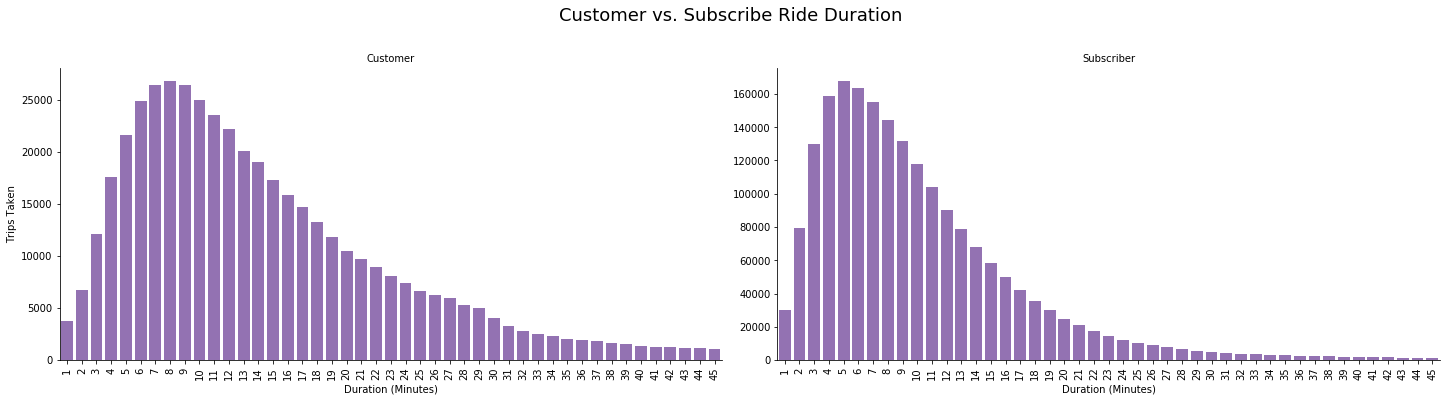

In [166]:
#Finally, our last comparative analysis of customers vs. subscribers will have to do with trip duration in minutes
colorr2 = sb.color_palette()[4]
cust_vs_sub_duration = df_clean.query('duration_mins <= 45')

cust_vs_sub_duration_plot = sb.catplot(data=cust_vs_sub_duration, x = 'duration_mins', col='user_type',
                                       kind='count', sharey = False, color = colorr2, aspect=2)

cust_vs_sub_duration_plot.set_axis_labels('Duration (Minutes)', 'Trips Taken')
cust_vs_sub_duration_plot.set_titles('{col_name}')
cust_vs_sub_duration_plot.fig.suptitle('Customer vs. Subscribe Ride Duration', y=1.1, fontsize=18)
cust_vs_sub_duration_plot.set_xticklabels(rotation=90);

Both of the charts show us that there is a strong preference for shorter rides, with the mode at around 5 minutes for subscribers, and 8 minutes for customers. A higher proportioner of customers use the bikes for longer than 20 minutes than subscribers, but there is definitely a preference for shorter trips on both sides. We can inspect this further by plotting average trip duration for customers vs. subscribers.

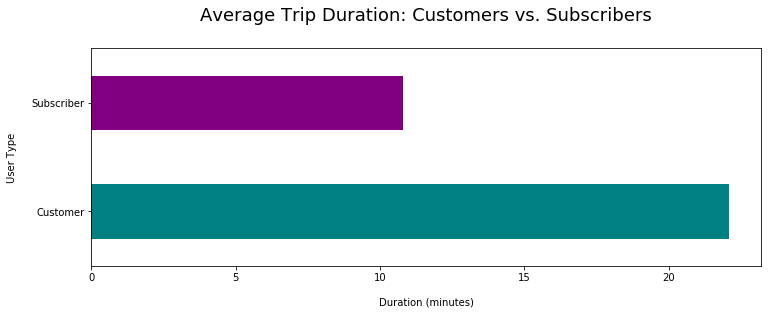

In [184]:
#Let's set the duration to a maximum of 30 minutes to zoom in on the difference.
colors=['Teal', 'Purple']
axis = df_clean.groupby('user_type')['duration_mins'].mean().plot(kind='barh', color=colors, figsize=(12,4))

axis.set_title('Average Trip Duration: Customers vs. Subscribers', fontsize=18, y=1.1)
axis.set_ylabel('User Type', labelpad=14)
axis.set_xlabel('Duration (minutes)', labelpad=14);

This bar chart highlights the difference in trip durations between customers and subscribers far more clearly than our previous chart. Our previous chart shows a relatively similar distribution with an inclination for both customers and subscribers to take shorter trips, but this chart shows us that, on average, customers take trips that are twice as long as subscribers.

### **Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?** 

A bi variate analysis of the two user types was extremely useful in highlighting the key behavioral differences between Customers and Subscribers. 

My analysis of the hourly, daily and monthly usage of this service by both customers and subscribers have allowed me to make the following assumptions:
- Subscribers tend to use the rentals more for daily commutes to work (demand is centered around rush hours for this cohort).
- Subscribers, unsurprisingly, are less likely to use the service during holiday season (November through December) as they have less working days, and could also leave the city for the holiday season.
- Customer usage peaks during holiday season, which might indicate that a good proportion of customers are out-of-town tourists (or people visiting family and friends in the Bay Area for holiday season). This theory is supported by the fact that weekend usage does not significantly decline for customers, and demand remains relatively steady throughout the week.

### **Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?**
Customers, on average, spend twice as long as subscribers using the service, which might indicate leisurely use, as they are not in as much of a rush to reach their destinations as subscribers might be. Additionally, winter weather (especially in January and February) is negatively associated with demand for both customers and subscribers.


## Multivariate Exploration

        In this section I will explore the relationship between three or more variables to dig deeper for insights.

Since I have spent the majority of the project analyzing time-related data, I will continue on the theme. Heat maps are a great way to visualize multiple variables, especially as they relate to time or location. I will be generating two heat maps that analyze the busiest days and hours for each user type.

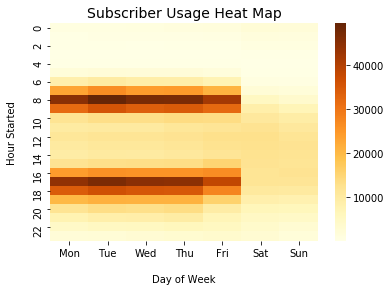

In [250]:
#We'll start off with creating a heat map for Subscribers to illustrate busiest times and days.

sub_timedata = df_clean.query('user_type == "Subscriber"').groupby(['start_dayofweek',
                                                    'start_hourofday'])['bike_id'].size().reset_index()
sub_timedata['start_dayofweek'] = pd.Categorical(sub_timedata['start_dayofweek'],
                                     categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)
sub_timedata = sub_timedata.pivot('start_hourofday', 'start_dayofweek', 'bike_id')

sub_heatmap = sb.heatmap(sub_timedata, cmap = 'YlOrBr')

plt.title("Subscriber Usage Heat Map", y=1.4, fontsize=14)
plt.xlabel('Day of Week', labelpad = 16)
plt.ylabel('Hour Started', labelpad = 16);

plt.show()

In the subscriber usage heat map above, we are able to amalgamate the separate data from previous sections, and view everything in one visual. The darkness that forms between 7am-10am and 5pm-7pm on weekdays is a clear sign that subscriber user traffic is primarily based around work-related daily commuting. Demand is far weaker during any other time on the graph, and we do not see high traffic (based on color scheme) on weekends compared to weekdays.

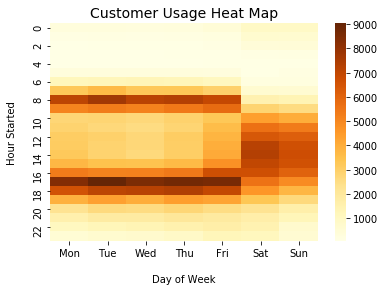

In [258]:
#We will compare this data with customer data of the same nature

cust_timedata = df_clean.query('user_type == "Customer"').groupby(['start_hourofday',
                                'start_dayofweek'])['bike_id'].size().reset_index()
cust_timedata['start_dayofweek'] = pd.Categorical(cust_timedata['start_dayofweek'],
                                     categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)
cust_timedata = cust_timedata.pivot('start_hourofday', 'start_dayofweek', 'bike_id')

sub_heatmap = sb.heatmap(cust_timedata, cmap = 'YlOrBr')

plt.title("Customer Usage Heat Map", y=1.4, fontsize=14)
plt.xlabel('Day of Week', labelpad = 16)
plt.ylabel('Hour Started', labelpad = 16);

plt.show()

The customer usage heat map tells us a different story than the subscriber heatmap. Demand is still strongest around commuting hours, much like the subscriber map, but we see a softer contrast between rush-hour traffic and traffic between the hours of 10AM-4PM. Additionally, weekend traffic (especially during the early afternoon) is quite strong, indicating that a larger proportion of customers use the service for leisure than subscribers.

/Users/talaldawudi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Text(0.5, 1.05, 'Trip Duration by Day of Week')

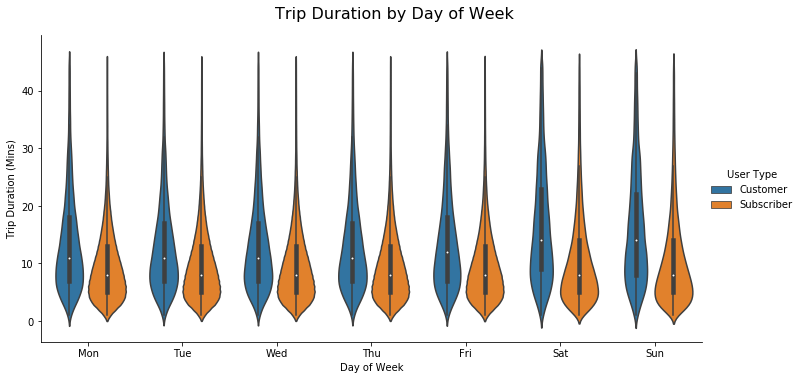

In [262]:
# To further explore trip duration, we'll create a Violin plot to see how duration varies by day of week and user type.

cust_vs_sub_duration = df_clean.query('duration_mins <= 45')
cust_vs_sub_duration['start_dayofweek'] = pd.Categorical(cust_vs_sub_duration['start_dayofweek'],
                                     categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)

graph = sb.catplot(data=cust_vs_sub_duration, x='start_dayofweek', y="duration_mins", 
                   hue="user_type", kind="violin", height=5, aspect=2)

graph.set_axis_labels("Day of Week", "Trip Duration (Mins)")
graph._legend.set_title('User Type')
graph.fig.suptitle('Trip Duration by Day of Week', y=1.05, fontsize=16);

This violin plot expands on our study of the difference in trip duration between customers and subscribers, but does so by adding an additional element: the day of the week. Adding this new dimension of exploration helps us see whether the pattern of customers taking longer trips (from previous section) varies based on the day of the week. On all days of the week, including the weekend, customers take, on average, longer trips than subscribers, and the difference in trip time is even more exaggerated on the weekend (see Sunday). However, as expected, subscribers take noticeably more time biking on weekends versus weekdays.

### **Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?**

Given the limited scope of the data (especially with regards to user demographics), I decided to dive deeper into the exploration of the time-related data. This data is important in helping us make assumptions about the reasons why people use the bike sharing service. A deeper look at the hourly and daily start times only confirmed what was initially apparent: subscribers tend to use the bike sharing service for daily work commutes (as indicated by busy rush hours and low activity on weekends). Creating a heat map helped display these variables more clearly, and provide a visual indication of the busiest times for the service.

### **Were there any interesting or surprising interactions between features?**
I was not particularly surprised by any of the interactions in heatmaps, as they are in line with my expectations for commuting options are in a large metropolis. However, it is still very interesting to see what the demand patterns look like, and adding the trip duration as a variable for my violin chart was especially helpful in seeing day-to-day variation.